In [1]:
import geopandas as gpd
import pandas as pd
import glob, os

In [2]:
sf = gpd.read_file("./vnm_adm_gov_20201027/vnm_admbnda_adm1_gov_20201027.shp")
print(sf.crs)  # Check EPSG / CRS -- epsg:4326 = WGS 84

EPSG:4326


In [3]:
sf = sf.to_crs(epsg=3405)  # Convert to WGS 84

In [4]:
sf.columns = [x.lower() for x in sf.columns]  # lower case col names
print(sf.dtypes)

# Check geometries
print(len(sf))
sf.geometry.type.value_counts()

sf.head()

shape_leng           float64
shape_area           float64
adm1_en               object
adm1_vi               object
adm1_pcode            object
adm1_ref              object
adm1alt1en            object
adm1alt2en            object
adm1alt1vi            object
adm1alt2vi            object
adm0_en               object
adm0_vi               object
adm0_pcode            object
date          datetime64[ms]
validon       datetime64[ms]
validto       datetime64[ms]
geometry            geometry
dtype: object
63


,shape_leng,shape_area,adm1_en,adm1_vi,adm1_pcode,adm1_ref,adm1alt1en,adm1alt2en,adm1alt1vi,adm1alt2vi,adm0_en,adm0_vi,adm0_pcode,date,validon,validto,geometry
0,2.900742,0.292040,An Giang,An Giang,VN805,None,None,None,None,None,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaT,"POLYGON ((512604.391 1211099.339, 512621.905 1..."
1,3.419187,0.163033,Ba Ria - Vung Tau,Bà Rịa - Vũng Tàu,VN717,None,None,None,None,None,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaT,"MULTIPOLYGON (((671178.242 954197.913, 671156...."
2,4.514786,0.338748,Bac Giang,Bắc Giang,VN221,None,None,None,None,None,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaT,"POLYGON ((620171.23 2391771.547, 620254.818 23..."
3,4.207590,0.425598,Bac Kan,Bắc Kạn,VN207,None,None,None,None,None,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaT,"POLYGON ((575937.22 2514970.196, 576276.916 25..."
4,2.879202,0.204050,Bac Lieu,Bạc Liêu,VN821,None,None,None,None,None,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaT,"POLYGON ((532601.619 1064534.687, 532685.512 1..."


In [5]:
viet_provinces = sf[["adm1_en", "adm1_vi", "shape_leng", "shape_area", "geometry"]]

In [8]:
import rioxarray as rxr
import earthpy as et

In [12]:
prefix = "./2024/GIOVANNI-g4.timeAvgMap."
suffix = ".20240101-20241231.102E_8N_110E_24N.tif"
NO2_2024_dir = prefix + "OMNO2d_003_ColumnAmountNO2CloudScreened" + suffix
NO2_trop_2024_dir = prefix + "OMNO2d_003_ColumnAmountNO2TropCloudScreened" + suffix
SO2_2024_dir = prefix + "OMSO2e_003_ColumnAmountSO2" + suffix

In [13]:
# View generate metadata associated with the raster file
NO2_2024 = rxr.open_rasterio(NO2_2024_dir, masked=True)
print("The bounds of your data are:", NO2_2024.rio.bounds())
print("The crs of your data is:", NO2_2024.rio.crs)
print("The shape of your data is:", NO2_2024.shape)
print("The spatial resolution for your data is:", NO2_2024.rio.resolution())
print("The metadata for your data is:", NO2_2024.attrs)

The bounds of your data are: (102.0, 8.0, 110.25, 24.25)
The crs of your data is: EPSG:4326
The shape of your data is: (1, 65, 33)
The spatial resolution for your data is: (0.25, -0.25)
The metadata for your data is: {'lat#bounds': 'lat_bnds', 'lat#standard_name': 'latitude', 'lat#units': 'degrees_north', 'lon#bounds': 'lon_bnds', 'lon#standard_name': 'longitude', 'lon#units': 'degrees_east', 'Conventions': 'CF-1.4', 'end_time': '2024-12-31T23:59:59Z', 'history': 'Tue Jan 28 14:23:27 2025: ncap2 -O -S /var/giovanni/session/TEMP/linearUnitsConversion_dcoq.ncap2 /var/giovanni/session/7EF2FA3E-DD81-11EF-BD3C-B5C1DED8F7C6/61EF5DC2-DD83-11EF-A86A-360EE0D8F7C6/61EF705A-DD83-11EF-A86A-360EE0D8F7C6/timeAvgMap.OMNO2d_003_ColumnAmountNO2CloudScreened.20240101-20241231.102E_8N_110E_24N.nc /var/giovanni/session/7EF2FA3E-DD81-11EF-BD3C-B5C1DED8F7C6/61EF5DC2-DD83-11EF-A86A-360EE0D8F7C6/61EF705A-DD83-11EF-A86A-360EE0D8F7C6/g4.timeAvgMap.OMNO2d_003_ColumnAmountNO2CloudScreened.20240101-20241231.102E_8

In [ ]:
# View generate metadata associated with the raster file
NO2_trop_2024 = rxr.open_rasterio(NO2_trop_2024_dir, masked=True)
print("The bounds of your data are:", NO2_trop_2024.rio.bounds())
print("The crs of your data is:", NO2_trop_2024.rio.crs)
print("The shape of your data is:", NO2_trop_2024.shape)
print("The spatial resolution for your data is:", NO2_trop_2024.rio.resolution())
print("The metadata for your data is:", NO2_trop_2024.attrs)

NameError: name 'NO2_trop_2024_dir' is not defined

In [13]:
# View generate metadata associated with the raster file
SO2_2024 = rxr.open_rasterio(SO2_2024_dir, masked=True)
print("The bounds of your data are:", SO2_2024.rio.bounds())
print("The crs of your data is:", SO2_2024.rio.crs)
print("The shape of your data is:", SO2_2024.shape)
print("The spatial resolution for your data is:", SO2_2024.rio.resolution())
print("The metadata for your data is:", SO2_2024.attrs)

The bounds of your data are: (101.99999237060547, 8.0, 110.24999237060547, 24.25)
The crs of your data is: EPSG:4326
The shape of your data is: (1, 65, 33)
The spatial resolution for your data is: (0.25, -0.25)
The metadata for your data is: {'AREA_OR_POINT': 'Area', 'lat#bounds': 'lat_bnds', 'lat#standard_name': 'latitude', 'lat#units': 'degrees_north', 'lon#bounds': 'lon_bnds', 'lon#standard_name': 'longitude', 'lon#units': 'degrees_east', 'Conventions': 'CF-1.4', 'end_time': '2023-12-31T23:59:59Z', 'history': 'Thu Feb  1 20:58:56 2024: ncks -O -x -v time_bnds timeAvgMap.OMSO2e_003_ColumnAmountSO2.20230101-20231231.101E_7N_110E_24N.nc timeAvgMap.OMSO2e_003_ColumnAmountSO2.20230101-20231231.101E_7N_110E_24N.nc\nThu Feb  1 20:58:56 2024: ncatted -a valid_range,,d,, -O -o timeAvgMap.OMSO2e_003_ColumnAmountSO2.20230101-20231231.101E_7N_110E_24N.nc timeAvgMap.OMSO2e_003_ColumnAmountSO2.20230101-20231231.101E_7N_110E_24N.nc\nThu Feb  1 20:58:55 2024: ncatted -O -a title,global,o,c,OMSO2e_0

In [14]:
import rasterio
from rasterio.plot import show

# Load the GeoTIFF file of NO2 observations
# raster_path = 'path_to_your_geotiff/NO2_observations.tif'
NO2_2022 = rasterio.open(NO2_2022_dir)

# Optionally, visualize the raster data
show(NO2_2022)

NameError: name 'NO2_2022_dir' is not defined

In [15]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

In [16]:
def reprojection(input_raster, output_raster, new_crs):
    with rasterio.open(input_raster) as src:
        transform, width, height = calculate_default_transform(
            src.crs, new_crs, src.width, src.height, *src.bounds
        )
        kwargs = src.meta.copy()
        kwargs.update(
            {"crs": new_crs, "transform": transform, "width": width, "height": height}
        )

        with rasterio.open(output_raster, "w", **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=new_crs,
                    resampling=Resampling.nearest,
                )

In [17]:
for file in glob.glob("./2024/*.tif"):
    reprojection(file, "./2024_reprojected/" + file.split("/")[-1], "EPSG:3405")

In [18]:
for file in glob.glob("./2024_reprojected/*.tif"):
    with rasterio.open(file) as src:
        assert src.crs == rasterio.crs.CRS.from_epsg(3405)

In [19]:
print(sf.crs)

EPSG:3405


In [20]:
NO2_2022_dir = "./2022_reprojected/GIOVANNI-g4.timeAvgMap.OMNO2d_003_ColumnAmountNO2CloudScreened.20220101-20221231.101E_7N_110E_24N.tif"
NO2_trop_2022_dir = "./2022_reprojected/GIOVANNI-g4.timeAvgMap.OMNO2d_003_ColumnAmountNO2TropCloudScreened.20220101-20221231.102E_8N_110E_24N.tif"
NO2_2023_dir = "./2023_reprojected/GIOVANNI-g4.timeAvgMap.OMNO2d_003_ColumnAmountNO2CloudScreened.20230101-20231231.101E_7N_110E_24N.tif"
NO2_trop_2023_dir = "./2023_reprojected/GIOVANNI-g4.timeAvgMap.OMNO2d_003_ColumnAmountNO2TropCloudScreened.20230101-20231231.102E_8N_110E_24N.tif"
SO2_2022_dir = "./2022_reprojected/GIOVANNI-g4.timeAvgMap.OMSO2e_003_ColumnAmountSO2.20220101-20221231.101E_7N_110E_24N.tif"
SO2_2023_dir = "./2023_reprojected/GIOVANNI-g4.timeAvgMap.OMSO2e_003_ColumnAmountSO2.20230101-20231231.101E_7N_110E_24N.tif"

In [21]:
from rasterstats import zonal_stats

# Use zonal_stats to calculate the average NO2 density for each province
mean_no2_2022 = zonal_stats(viet_provinces, NO2_2022_dir, stats="mean")
mean_no2_trop_2022 = zonal_stats(viet_provinces, NO2_trop_2022_dir, stats="mean")
mean_no2_2023 = zonal_stats(viet_provinces, NO2_2023_dir, stats="mean")
mean_no2_trop_2023 = zonal_stats(viet_provinces, NO2_trop_2023_dir, stats="mean")
mean_so2_2022 = zonal_stats(viet_provinces, SO2_2022_dir, stats="mean")
mean_so2_2023 = zonal_stats(viet_provinces, SO2_2023_dir, stats="mean")

# Add the average NO2 density to the provinces GeoDataFrame
viet_provinces["NO2_mean_2022"] = [stat["mean"] for stat in mean_no2_2022]
viet_provinces["NO2_trop_mean_2022"] = [stat["mean"] for stat in mean_no2_trop_2022]
viet_provinces["NO2_mean_2023"] = [stat["mean"] for stat in mean_no2_2023]
viet_provinces["NO2_trop_mean_2023"] = [stat["mean"] for stat in mean_no2_trop_2023]
viet_provinces["SO2_mean_2022"] = [stat["mean"] for stat in mean_so2_2022]
viet_provinces["SO2_mean_2023"] = [stat["mean"] for stat in mean_so2_2023]

/home/codespace/.python/current/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/codespace/.python/current/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/codespace/.python/current/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [22]:
# Check the first few rows to verify the NO2 density values
viet_provinces.head()

,adm1_en,adm1_vi,shape_leng,shape_area,geometry,NO2_mean_2022,NO2_trop_mean_2022,NO2_mean_2023,NO2_trop_mean_2023,SO2_mean_2022,SO2_mean_2023
0,An Giang,An Giang,2.900742,0.292040,"POLYGON ((512604.391 1211099.339, 512621.905 1...",0.121002,0.031152,0.119977,0.030605,0.065910,0.056934
1,Ba Ria - Vung Tau,Bà Rịa - Vũng Tàu,3.419187,0.163033,"MULTIPOLYGON (((671178.242 954197.913, 671156....",0.150131,0.059942,0.138275,0.048476,0.002134,0.021421
2,Bac Giang,Bắc Giang,4.514786,0.338748,"POLYGON ((620171.230 2391771.547, 620254.818 2...",0.204899,0.109664,0.220060,0.119971,0.119881,0.086080
3,Bac Kan,Bắc Kạn,4.207590,0.425598,"POLYGON ((575937.220 2514970.196, 576276.916 2...",0.132601,0.036045,0.145145,0.045198,0.019670,0.023974
4,Bac Lieu,Bạc Liêu,2.879202,0.204050,"POLYGON ((532601.619 1064534.687, 532685.512 1...",0.110835,0.020923,0.109321,0.021354,0.010314,0.014732


All measures are in Dobson unit:

The Dobson unit (DU) is a unit of measurement of the amount of a trace gas in a vertical column through the Earth's atmosphere.

In [23]:
viet_provinces_nogeom = viet_provinces.drop(columns=["geometry"])

In [24]:
viet_provinces_nogeom.to_csv("vietnam_air_pollution_v4.csv", index=False)

In [25]:
viet_provinces_reprojected = viet_provinces.to_crs(epsg=4326)

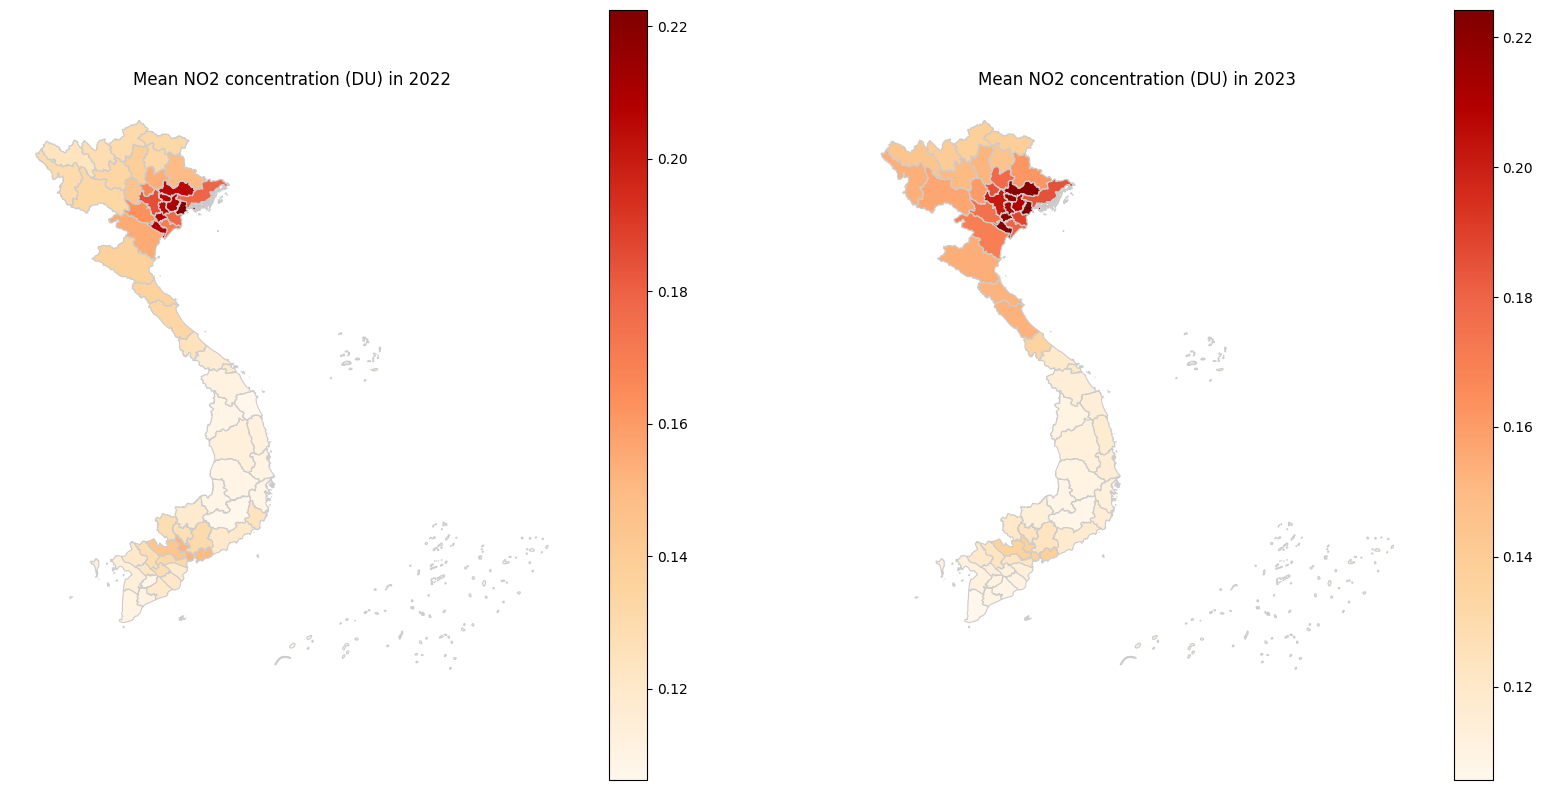

In [26]:
# plot the NO2 mean values for 2022 and 2023 on a map of Vietnam side by side
import matplotlib.pyplot as plt
import geopandas as gpd

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

viet_provinces_reprojected.plot(
    column="NO2_mean_2022",
    cmap="OrRd",
    linewidth=0.8,
    ax=ax[0],
    edgecolor="0.8",
    legend=True,
)
ax[0].axis("off")
ax[0].set_title("Mean NO2 concentration (DU) in 2022")

viet_provinces_reprojected.plot(
    column="NO2_mean_2023",
    cmap="OrRd",
    linewidth=0.8,
    ax=ax[1],
    edgecolor="0.8",
    legend=True,
)
ax[1].axis("off")
ax[1].set_title("Mean NO2 concentration (DU) in 2023")

plt.show()

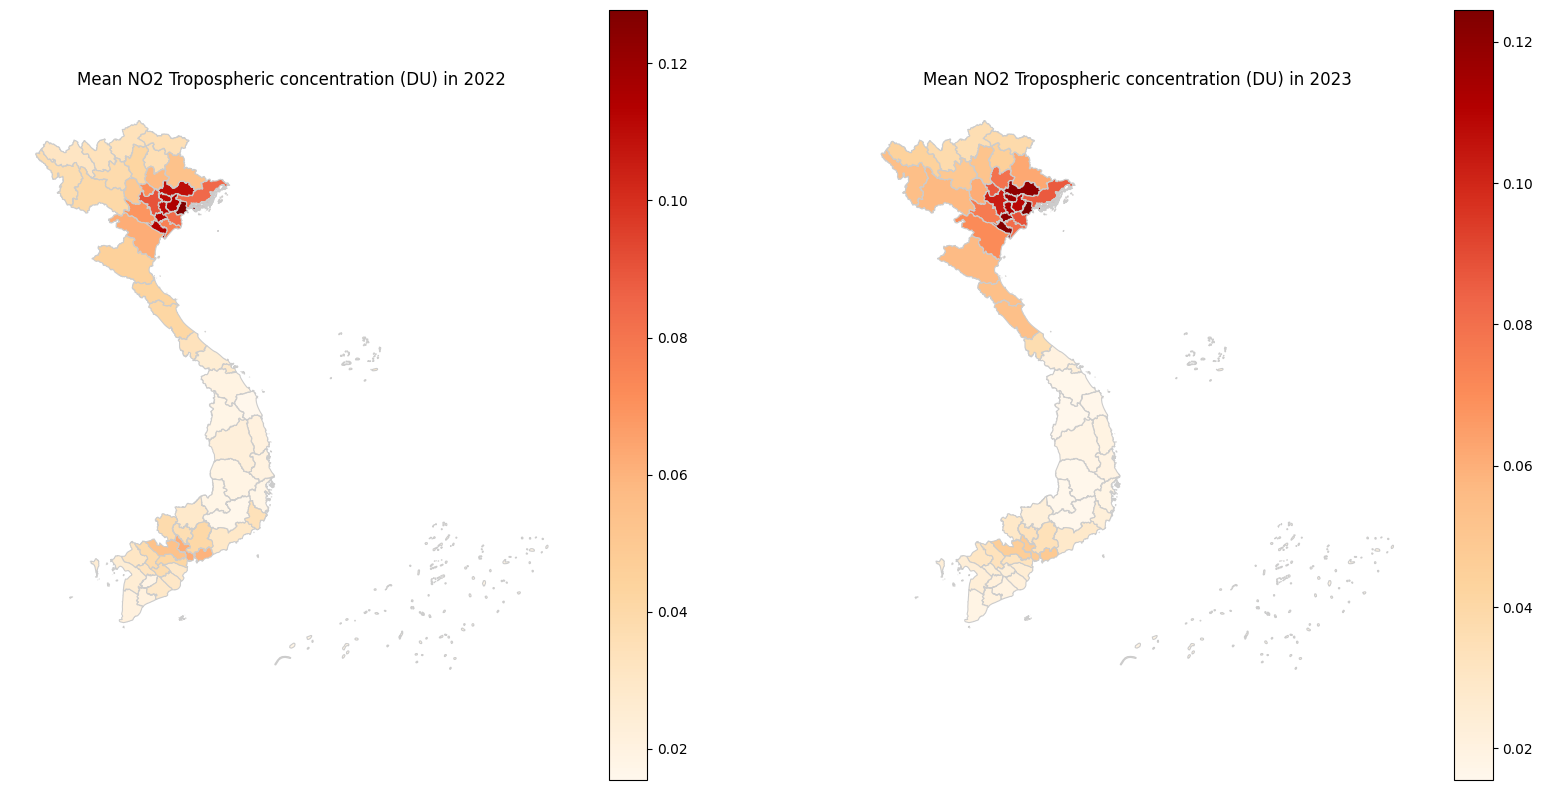

In [27]:
# plot the same for NO2 Tropospheric
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
viet_provinces_reprojected.plot(
    column="NO2_trop_mean_2022",
    cmap="OrRd",
    linewidth=0.8,
    ax=ax[0],
    edgecolor="0.8",
    legend=True,
)
ax[0].axis("off")
ax[0].set_title("Mean NO2 Tropospheric concentration (DU) in 2022")

viet_provinces_reprojected.plot(
    column="NO2_trop_mean_2023",
    cmap="OrRd",
    linewidth=0.8,
    ax=ax[1],
    edgecolor="0.8",
    legend=True,
)
ax[1].axis("off")
ax[1].set_title("Mean NO2 Tropospheric concentration (DU) in 2023")

plt.show()

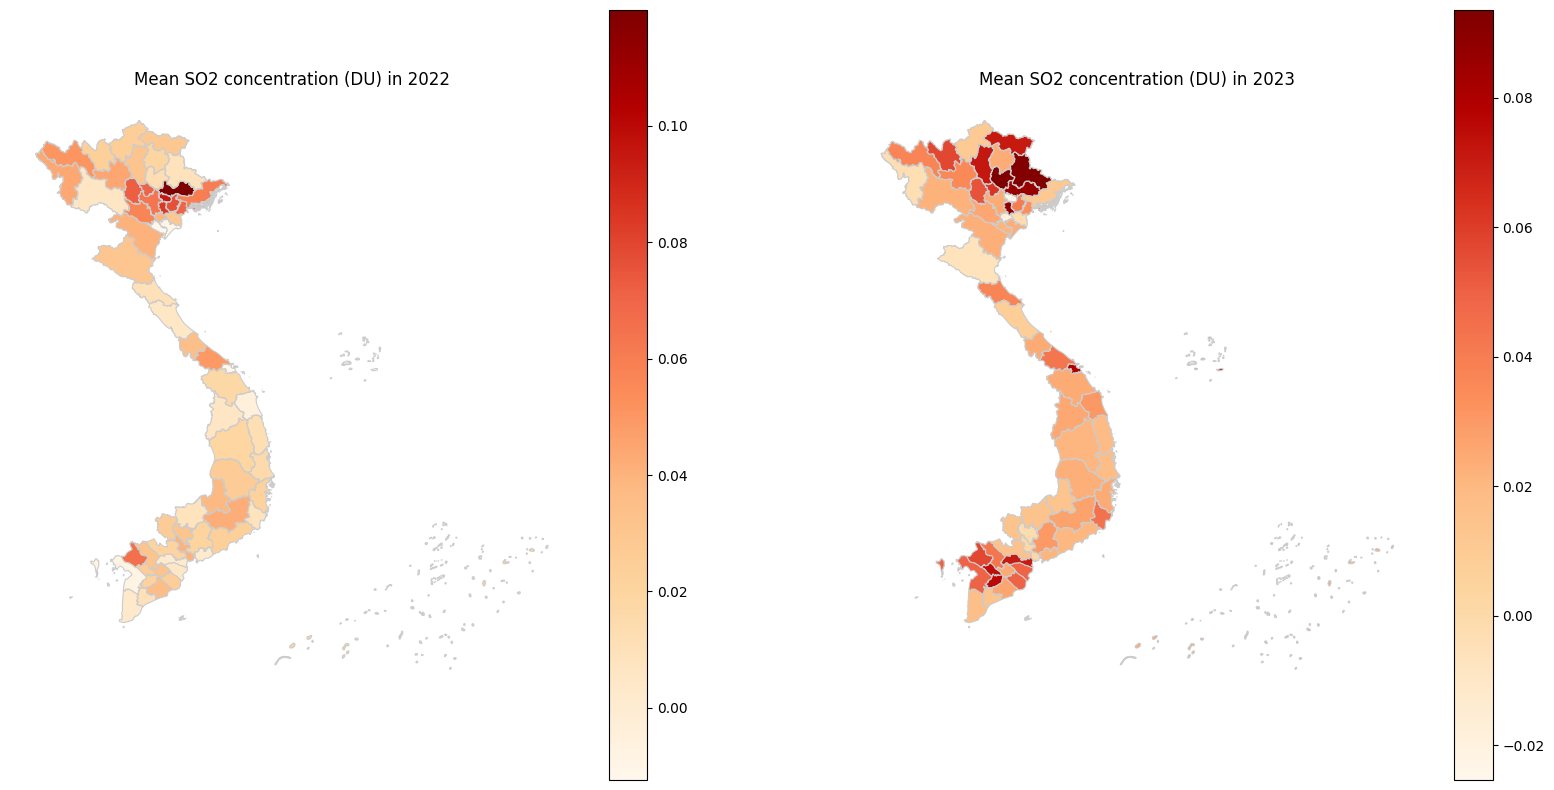

In [28]:
# plot the same for SO2
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

viet_provinces_reprojected.plot(
    column="SO2_mean_2022",
    cmap="OrRd",
    linewidth=0.8,
    ax=ax[0],
    edgecolor="0.8",
    legend=True,
)
ax[0].axis("off")
ax[0].set_title("Mean SO2 concentration (DU) in 2022")

viet_provinces_reprojected.plot(
    column="SO2_mean_2023",
    cmap="OrRd",
    linewidth=0.8,
    ax=ax[1],
    edgecolor="0.8",
    legend=True,
)
ax[1].axis("off")
ax[1].set_title("Mean SO2 concentration (DU) in 2023")

plt.show()